# Business Understanding

In [2]:
import pandas as pd
import re
df = pd.read_csv('welmabca.csv', delimiter=';')
df

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Wed Jun 28 05:19:38 +0000 2023,1673924092129574914,"Mulai 1 Juli 2023, Aplikasi Welma resmi pindah...",0,0,0,4,in,351429302,1673924092129574914,XpresiBCA,https://twitter.com/XpresiBCA/status/167392409...
1,Thu Jun 22 11:09:01 +0000 2023,1671837690634076160,"@Rudigesper Selamat malam, @Rudigesper. Apabil...",0,0,0,0,in,567255514,1666775816431349766,BankBCA,https://twitter.com/BankBCA/status/16718376906...
2,Thu Jun 22 06:12:04 +0000 2023,1671762962238025728,"Mulai 1 Juli 2023, aplikasi Welma tidak dapat ...",0,2,0,1,in,567255514,1671762956886085637,BankBCA,https://twitter.com/BankBCA/status/16717629622...
3,Sun Jun 18 02:18:53 +0000 2023,1670254726045401088,Pengumuman! BCA Setop Operasi Aplikasi Welma M...,0,0,0,0,in,1668449204744900608,1670254726045401088,MinakMinmo7825,https://twitter.com/MinakMinmo7825/status/1670...
4,Sun Jun 18 02:18:47 +0000 2023,1670254700774690816,Pengumuman! BCA Setop Operasi Aplikasi Welma M...,0,0,0,0,in,1668449204744900608,1670254700774690816,MinakMinmo7825,https://twitter.com/MinakMinmo7825/status/1670...
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Sat Oct 17 04:14:00 +0000 2020,1317317915318734848,"Bingung sekarang lagi ramai bahas ORI, SR, SBR...",0,0,0,1,in,31614598,1317317915318734848,LokadataInfo,https://twitter.com/LokadataInfo/status/131731...
377,Fri Oct 16 04:30:00 +0000 2020,1316959555050373120,"Bingung sekarang lagi ramai bahas ORI, SR, SBR...",0,0,1,0,in,31614598,1316959555050373120,LokadataInfo,https://twitter.com/LokadataInfo/status/131695...
378,Thu Oct 15 06:46:57 +0000 2020,1316631631197732865,"Bingung orang2 skr lagi ramai bahas ORI, SR, S...",0,1,3,0,in,2837798976,1316631631197732865,smartmoney_co,https://twitter.com/smartmoney_co/status/13166...
379,Thu Oct 08 08:15:29 +0000 2020,1314117197174722565,@gabrielleegaby Kami infokan apabila aplikasi ...,0,1,0,0,in,620977821,1314112123564294144,HaloBCA,https://twitter.com/HaloBCA/status/13141171971...


# Pre Processing

# Case folding & regex

In [3]:
import string

df['clean_tweet'] = df['full_text'] 

In [4]:
import re

df['clean_tweet'] = df['clean_tweet'].str.replace(r'\d+', '', regex=True) #menghapus kata yang menempel pada sbeuah kata

import re

df['clean_tweet'] = df['clean_tweet'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True) #menghapus kata yang menempel pada sbeuah kata

df['clean_tweet'] = df['clean_tweet'].str.translate(str.maketrans("","", string.punctuation))

df

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,clean_tweet
0,Wed Jun 28 05:19:38 +0000 2023,1673924092129574914,"Mulai 1 Juli 2023, Aplikasi Welma resmi pindah...",0,0,0,4,in,351429302,1673924092129574914,XpresiBCA,https://twitter.com/XpresiBCA/status/167392409...,Mulai Juli Aplikasi Welma resmi pindah rumah...
1,Thu Jun 22 11:09:01 +0000 2023,1671837690634076160,"@Rudigesper Selamat malam, @Rudigesper. Apabil...",0,0,0,0,in,567255514,1666775816431349766,BankBCA,https://twitter.com/BankBCA/status/16718376906...,Rudigesper Selamat malam Rudigesper Apabila An...
2,Thu Jun 22 06:12:04 +0000 2023,1671762962238025728,"Mulai 1 Juli 2023, aplikasi Welma tidak dapat ...",0,2,0,1,in,567255514,1671762956886085637,BankBCA,https://twitter.com/BankBCA/status/16717629622...,Mulai Juli aplikasi Welma tidak dapat diakse...
3,Sun Jun 18 02:18:53 +0000 2023,1670254726045401088,Pengumuman! BCA Setop Operasi Aplikasi Welma M...,0,0,0,0,in,1668449204744900608,1670254726045401088,MinakMinmo7825,https://twitter.com/MinakMinmo7825/status/1670...,Pengumuman BCA Setop Operasi Aplikasi Welma Mu...
4,Sun Jun 18 02:18:47 +0000 2023,1670254700774690816,Pengumuman! BCA Setop Operasi Aplikasi Welma M...,0,0,0,0,in,1668449204744900608,1670254700774690816,MinakMinmo7825,https://twitter.com/MinakMinmo7825/status/1670...,Pengumuman BCA Setop Operasi Aplikasi Welma Mu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,Sat Oct 17 04:14:00 +0000 2020,1317317915318734848,"Bingung sekarang lagi ramai bahas ORI, SR, SBR...",0,0,0,1,in,31614598,1317317915318734848,LokadataInfo,https://twitter.com/LokadataInfo/status/131731...,Bingung sekarang lagi ramai bahas ORI SR SBR s...
377,Fri Oct 16 04:30:00 +0000 2020,1316959555050373120,"Bingung sekarang lagi ramai bahas ORI, SR, SBR...",0,0,1,0,in,31614598,1316959555050373120,LokadataInfo,https://twitter.com/LokadataInfo/status/131695...,Bingung sekarang lagi ramai bahas ORI SR SBR s...
378,Thu Oct 15 06:46:57 +0000 2020,1316631631197732865,"Bingung orang2 skr lagi ramai bahas ORI, SR, S...",0,1,3,0,in,2837798976,1316631631197732865,smartmoney_co,https://twitter.com/smartmoney_co/status/13166...,Bingung orang skr lagi ramai bahas ORI SR SBR ...
379,Thu Oct 08 08:15:29 +0000 2020,1314117197174722565,@gabrielleegaby Kami infokan apabila aplikasi ...,0,1,0,0,in,620977821,1314112123564294144,HaloBCA,https://twitter.com/HaloBCA/status/13141171971...,gabrielleegaby Kami infokan apabila aplikasi W...


# Clear Emoji

In [5]:
df['clean_tweet'] = df['clean_tweet'].str.strip()

df['clean_tweet'] = df['clean_tweet'].str.split()

def clear_emoji(data):
    word_emoji = data
    word_list = [] 
    
    emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"
                u"\U0001F300-\U0001F5FF"
                u"\U0001F680-\U0001F6FF"
                u"\U0001F1E0-\U0001F1FF"
                                "]+", flags=re.UNICODE)
    for word in word_emoji:
        emoji_pattern.sub(r'', word)
        word_list.append(word)
        
    data = ' '.join(word_list)
    return data

df['clean_tweet'] = df['clean_tweet'].apply(lambda x: clear_emoji(x))

df

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,clean_tweet
0,Wed Jun 28 05:19:38 +0000 2023,1673924092129574914,"Mulai 1 Juli 2023, Aplikasi Welma resmi pindah...",0,0,0,4,in,351429302,1673924092129574914,XpresiBCA,https://twitter.com/XpresiBCA/status/167392409...,Mulai Juli Aplikasi Welma resmi pindah rumah k...
1,Thu Jun 22 11:09:01 +0000 2023,1671837690634076160,"@Rudigesper Selamat malam, @Rudigesper. Apabil...",0,0,0,0,in,567255514,1666775816431349766,BankBCA,https://twitter.com/BankBCA/status/16718376906...,Rudigesper Selamat malam Rudigesper Apabila An...
2,Thu Jun 22 06:12:04 +0000 2023,1671762962238025728,"Mulai 1 Juli 2023, aplikasi Welma tidak dapat ...",0,2,0,1,in,567255514,1671762956886085637,BankBCA,https://twitter.com/BankBCA/status/16717629622...,Mulai Juli aplikasi Welma tidak dapat diakses ...
3,Sun Jun 18 02:18:53 +0000 2023,1670254726045401088,Pengumuman! BCA Setop Operasi Aplikasi Welma M...,0,0,0,0,in,1668449204744900608,1670254726045401088,MinakMinmo7825,https://twitter.com/MinakMinmo7825/status/1670...,Pengumuman BCA Setop Operasi Aplikasi Welma Mu...
4,Sun Jun 18 02:18:47 +0000 2023,1670254700774690816,Pengumuman! BCA Setop Operasi Aplikasi Welma M...,0,0,0,0,in,1668449204744900608,1670254700774690816,MinakMinmo7825,https://twitter.com/MinakMinmo7825/status/1670...,Pengumuman BCA Setop Operasi Aplikasi Welma Mu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,Sat Oct 17 04:14:00 +0000 2020,1317317915318734848,"Bingung sekarang lagi ramai bahas ORI, SR, SBR...",0,0,0,1,in,31614598,1317317915318734848,LokadataInfo,https://twitter.com/LokadataInfo/status/131731...,Bingung sekarang lagi ramai bahas ORI SR SBR s...
377,Fri Oct 16 04:30:00 +0000 2020,1316959555050373120,"Bingung sekarang lagi ramai bahas ORI, SR, SBR...",0,0,1,0,in,31614598,1316959555050373120,LokadataInfo,https://twitter.com/LokadataInfo/status/131695...,Bingung sekarang lagi ramai bahas ORI SR SBR s...
378,Thu Oct 15 06:46:57 +0000 2020,1316631631197732865,"Bingung orang2 skr lagi ramai bahas ORI, SR, S...",0,1,3,0,in,2837798976,1316631631197732865,smartmoney_co,https://twitter.com/smartmoney_co/status/13166...,Bingung orang skr lagi ramai bahas ORI SR SBR ...
379,Thu Oct 08 08:15:29 +0000 2020,1314117197174722565,@gabrielleegaby Kami infokan apabila aplikasi ...,0,1,0,0,in,620977821,1314112123564294144,HaloBCA,https://twitter.com/HaloBCA/status/13141171971...,gabrielleegaby Kami infokan apabila aplikasi W...


## tokenizing

In [6]:
import nltk 
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenizing(data):
    data = word_tokenize(data)
    return data

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
#kita akan memodifikasi sedikit yaitu mengubah kata slank menjadi kata baku

slang_list = [('yg', 'yang'), 
             ('ga', 'tidak'),
              ('gak', 'tidak'),
              ('aja', 'saja'),
              ('kalo', 'kalau'),
              ('gue', 'saya'),
              ('aku', 'saya'),
              ('bgt', 'banget'),
             ]

def slang_cleaner(data, slang_list:list=[]):
    word_token = tokenizing(data)
    
    word_list = []
    
    for word in word_token:
        for slang in slang_list:
            if word.lower() in slang[0].lower():
                word = slang[1]
                break 
        word_list.append(word)
            
    data = ' '.join(word_list)
    return data 
    
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: slang_cleaner(x, slang_list))
df

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,clean_tweet
0,Wed Jun 28 05:19:38 +0000 2023,1673924092129574914,"Mulai 1 Juli 2023, Aplikasi Welma resmi pindah...",0,0,0,4,in,351429302,1673924092129574914,XpresiBCA,https://twitter.com/XpresiBCA/status/167392409...,Mulai Juli Aplikasi Welma resmi pindah rumah k...
1,Thu Jun 22 11:09:01 +0000 2023,1671837690634076160,"@Rudigesper Selamat malam, @Rudigesper. Apabil...",0,0,0,0,in,567255514,1666775816431349766,BankBCA,https://twitter.com/BankBCA/status/16718376906...,Rudigesper Selamat malam Rudigesper Apabila An...
2,Thu Jun 22 06:12:04 +0000 2023,1671762962238025728,"Mulai 1 Juli 2023, aplikasi Welma tidak dapat ...",0,2,0,1,in,567255514,1671762956886085637,BankBCA,https://twitter.com/BankBCA/status/16717629622...,Mulai Juli aplikasi Welma tidak dapat diakses ...
3,Sun Jun 18 02:18:53 +0000 2023,1670254726045401088,Pengumuman! BCA Setop Operasi Aplikasi Welma M...,0,0,0,0,in,1668449204744900608,1670254726045401088,MinakMinmo7825,https://twitter.com/MinakMinmo7825/status/1670...,Pengumuman BCA Setop Operasi Aplikasi Welma Mu...
4,Sun Jun 18 02:18:47 +0000 2023,1670254700774690816,Pengumuman! BCA Setop Operasi Aplikasi Welma M...,0,0,0,0,in,1668449204744900608,1670254700774690816,MinakMinmo7825,https://twitter.com/MinakMinmo7825/status/1670...,Pengumuman BCA Setop Operasi Aplikasi Welma Mu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,Sat Oct 17 04:14:00 +0000 2020,1317317915318734848,"Bingung sekarang lagi ramai bahas ORI, SR, SBR...",0,0,0,1,in,31614598,1317317915318734848,LokadataInfo,https://twitter.com/LokadataInfo/status/131731...,Bingung sekarang lagi ramai bahas ORI SR SBR s...
377,Fri Oct 16 04:30:00 +0000 2020,1316959555050373120,"Bingung sekarang lagi ramai bahas ORI, SR, SBR...",0,0,1,0,in,31614598,1316959555050373120,LokadataInfo,https://twitter.com/LokadataInfo/status/131695...,Bingung sekarang lagi ramai bahas ORI SR SBR s...
378,Thu Oct 15 06:46:57 +0000 2020,1316631631197732865,"Bingung orang2 skr lagi ramai bahas ORI, SR, S...",0,1,3,0,in,2837798976,1316631631197732865,smartmoney_co,https://twitter.com/smartmoney_co/status/13166...,Bingung orang skr lagi ramai bahas ORI SR SBR ...
379,Thu Oct 08 08:15:29 +0000 2020,1314117197174722565,@gabrielleegaby Kami infokan apabila aplikasi ...,0,1,0,0,in,620977821,1314112123564294144,HaloBCA,https://twitter.com/HaloBCA/status/13141171971...,gabrielleegaby Kami infokan apabila aplikasi W...


## Filtering

In [8]:
df

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,clean_tweet
0,Wed Jun 28 05:19:38 +0000 2023,1673924092129574914,"Mulai 1 Juli 2023, Aplikasi Welma resmi pindah...",0,0,0,4,in,351429302,1673924092129574914,XpresiBCA,https://twitter.com/XpresiBCA/status/167392409...,Mulai Juli Aplikasi Welma resmi pindah rumah k...
1,Thu Jun 22 11:09:01 +0000 2023,1671837690634076160,"@Rudigesper Selamat malam, @Rudigesper. Apabil...",0,0,0,0,in,567255514,1666775816431349766,BankBCA,https://twitter.com/BankBCA/status/16718376906...,Rudigesper Selamat malam Rudigesper Apabila An...
2,Thu Jun 22 06:12:04 +0000 2023,1671762962238025728,"Mulai 1 Juli 2023, aplikasi Welma tidak dapat ...",0,2,0,1,in,567255514,1671762956886085637,BankBCA,https://twitter.com/BankBCA/status/16717629622...,Mulai Juli aplikasi Welma tidak dapat diakses ...
3,Sun Jun 18 02:18:53 +0000 2023,1670254726045401088,Pengumuman! BCA Setop Operasi Aplikasi Welma M...,0,0,0,0,in,1668449204744900608,1670254726045401088,MinakMinmo7825,https://twitter.com/MinakMinmo7825/status/1670...,Pengumuman BCA Setop Operasi Aplikasi Welma Mu...
4,Sun Jun 18 02:18:47 +0000 2023,1670254700774690816,Pengumuman! BCA Setop Operasi Aplikasi Welma M...,0,0,0,0,in,1668449204744900608,1670254700774690816,MinakMinmo7825,https://twitter.com/MinakMinmo7825/status/1670...,Pengumuman BCA Setop Operasi Aplikasi Welma Mu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,Sat Oct 17 04:14:00 +0000 2020,1317317915318734848,"Bingung sekarang lagi ramai bahas ORI, SR, SBR...",0,0,0,1,in,31614598,1317317915318734848,LokadataInfo,https://twitter.com/LokadataInfo/status/131731...,Bingung sekarang lagi ramai bahas ORI SR SBR s...
377,Fri Oct 16 04:30:00 +0000 2020,1316959555050373120,"Bingung sekarang lagi ramai bahas ORI, SR, SBR...",0,0,1,0,in,31614598,1316959555050373120,LokadataInfo,https://twitter.com/LokadataInfo/status/131695...,Bingung sekarang lagi ramai bahas ORI SR SBR s...
378,Thu Oct 15 06:46:57 +0000 2020,1316631631197732865,"Bingung orang2 skr lagi ramai bahas ORI, SR, S...",0,1,3,0,in,2837798976,1316631631197732865,smartmoney_co,https://twitter.com/smartmoney_co/status/13166...,Bingung orang skr lagi ramai bahas ORI SR SBR ...
379,Thu Oct 08 08:15:29 +0000 2020,1314117197174722565,@gabrielleegaby Kami infokan apabila aplikasi ...,0,1,0,0,in,620977821,1314112123564294144,HaloBCA,https://twitter.com/HaloBCA/status/13141171971...,gabrielleegaby Kami infokan apabila aplikasi W...


In [9]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

df['clean_tweet'] = df['clean_tweet'].str.strip()

df['clean_tweet'] = df['clean_tweet'].str.split()

def clear_stopwords(word_list):
    processing_word_list = []
    
    for word in word_list:
        word = word.lower()
        
        if word not in stopwords.words("Indonesian"):
            lemma = lemmatizer.lemmatize(word)
            processing_word_list.append(word)
    return processing_word_list

df['clean_tweet'] = df['clean_tweet'].apply(lambda x: clear_stopwords(x))
df['clean_tweet'] = df['clean_tweet'].str.join(' ')
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,clean_tweet
0,Wed Jun 28 05:19:38 +0000 2023,1673924092129574914,"Mulai 1 Juli 2023, Aplikasi Welma resmi pindah...",0,0,0,4,in,351429302,1673924092129574914,XpresiBCA,https://twitter.com/XpresiBCA/status/167392409...,juli aplikasi welma resmi pindah rumah mybca c...
1,Thu Jun 22 11:09:01 +0000 2023,1671837690634076160,"@Rudigesper Selamat malam, @Rudigesper. Apabil...",0,0,0,0,in,567255514,1666775816431349766,BankBCA,https://twitter.com/BankBCA/status/16718376906...,rudigesper selamat malam rudigesper berminat s...
2,Thu Jun 22 06:12:04 +0000 2023,1671762962238025728,"Mulai 1 Juli 2023, aplikasi Welma tidak dapat ...",0,2,0,1,in,567255514,1671762956886085637,BankBCA,https://twitter.com/BankBCA/status/16717629622...,juli aplikasi welma diakses akses fitur welma ...
3,Sun Jun 18 02:18:53 +0000 2023,1670254726045401088,Pengumuman! BCA Setop Operasi Aplikasi Welma M...,0,0,0,0,in,1668449204744900608,1670254726045401088,MinakMinmo7825,https://twitter.com/MinakMinmo7825/status/1670...,pengumuman bca setop operasi aplikasi welma ju...
4,Sun Jun 18 02:18:47 +0000 2023,1670254700774690816,Pengumuman! BCA Setop Operasi Aplikasi Welma M...,0,0,0,0,in,1668449204744900608,1670254700774690816,MinakMinmo7825,https://twitter.com/MinakMinmo7825/status/1670...,pengumuman bca setop operasi aplikasi welma ju...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,Sat Oct 17 04:14:00 +0000 2020,1317317915318734848,"Bingung sekarang lagi ramai bahas ORI, SR, SBR...",0,0,0,1,in,31614598,1317317915318734848,LokadataInfo,https://twitter.com/LokadataInfo/status/131731...,bingung ramai bahas ori sr sbr reksa dana peng...
377,Fri Oct 16 04:30:00 +0000 2020,1316959555050373120,"Bingung sekarang lagi ramai bahas ORI, SR, SBR...",0,0,1,0,in,31614598,1316959555050373120,LokadataInfo,https://twitter.com/LokadataInfo/status/131695...,bingung ramai bahas ori sr sbr reksa dana peng...
378,Thu Oct 15 06:46:57 +0000 2020,1316631631197732865,"Bingung orang2 skr lagi ramai bahas ORI, SR, S...",0,1,3,0,in,2837798976,1316631631197732865,smartmoney_co,https://twitter.com/smartmoney_co/status/13166...,bingung orang skr ramai bahas ori sr sbr reksa...
379,Thu Oct 08 08:15:29 +0000 2020,1314117197174722565,@gabrielleegaby Kami infokan apabila aplikasi ...,0,1,0,0,in,620977821,1314112123564294144,HaloBCA,https://twitter.com/HaloBCA/status/13141171971...,gabrielleegaby infokan aplikasi welma terbloki...


## Data Processing

In [10]:
import numpy as np

pos_list= open("./kata_positif.txt","r")
pos_kata = pos_list.readlines()
neg_list= open("./kata_negatif.txt","r")
neg_kata = neg_list.readlines()

# merubah kolom clean_tweet menjadi list
items = df['clean_tweet'].tolist()

# Membuat list kosong hasil yang akan digunakan untuk menyimpan hasil perhitungan nilai positif dan negatif dari setiap teks.
hasil = []

# Membuat list yang berisi kata-kata yang menandakan adanya antitesis atau kebalikan dari kata-kata berikutnya dalam teks.
list_anti = ['tidak','lawan','anti', 'belum', 'belom', 'tdk', 'jangan', 'gak', 'enggak', 'bukan', 'sulit', 'tak', 'sblm']

# membuat loop untuk melakukan perhitungan nilai positif dan negatif.
for item in items:
    tweets = item.strip().split()
    
    count_p = 0 #nilai positif
    count_n = 0 #nilai negatif
    
    for tweet in tweets:
        '''
        buat loop dan kondisi untuk Memeriksa kata positif, 
        jika ada kecocokan, maka dilakukan pengecekan apakah kata sebelumnya termasuk dalam list_anti. 
        Jika iya, maka kata tersebut dianggap negatif, sehingga count_n ditambah 1. 
        Jika tidak, maka kata tersebut dianggap positif, sehingga count_p ditambah 1.
        '''
        for kata_pos in pos_kata:
            if kata_pos.strip().lower() == tweet.lower():
                if items[items.index(item)-1] in list_anti:
                    print(items[items.index(item)-1], kata_pos, ['negatif'])
                    count_n += 1
                else:
                    print(kata_pos, ['positif'])
                    count_p += 1
                    
        '''
        buat loop dan kondisi untuk Memeriksa kata negatif, 
        jika ada kecocokan, maka dilakukan pengecekan apakah kata sebelumnya termasuk dalam list_anti. 
        Jika iya, maka kata tersebut dianggap positif, sehingga count_p ditambah 1. 
        Jika tidak, maka kata tersebut dianggap negatif, sehingga count_n ditambah 1.
        '''
        for kata_neg in neg_kata:
            if kata_neg.strip().lower() == tweet.lower():
                if items[items.index(item)-1] in list_anti:
                    print(items[items.index(item)-1], kata_neg, ['positif'])
                    count_p += 1
                else:
                    print(kata_neg, ['negatif'])
                    count_n += 1
    # Setelah semua kata dalam teks diproses, hitung hasil skor yang didapat
    hasil.append(count_p - count_n)

# terakhir, tampilkan nilai rata-rata dan standar deviasi:
print ("Nilai rata-rata: "+str(np.mean(hasil)))
print ("Standar deviasi: "+str(np.std(hasil)))

resmi
 ['positif']
praktis
 ['positif']
selamat
 ['positif']
berminat
 ['positif']
lupa
 ['negatif']
lupa
 ['negatif']
tutup
 ['negatif']
panik
 ['negatif']
disayangkan
 ['negatif']
lupa
 ['negatif']
sesuai
 ['positif']
disayangkan
 ['negatif']
lupa
 ['negatif']
sesuai
 ['positif']
bingung
 ['negatif']
bingung
 ['negatif']
belajar
 ['positif']
maaf
 ['positif']
maaf
 ['positif']
cepat
 ['positif']
senang
 ['positif']
senang
 ['positif']
bagus
 ['positif']
senang
 ['positif']
senang
 ['positif']
bingung
 ['negatif']
bingung
 ['negatif']
turun
 ['negatif']
sesuai
 ['positif']
dikhawatirkan
 ['negatif']
murah
 ['positif']
mandiri
 ['positif']
berharga
 ['positif']
lupa
 ['negatif']
maaf
 ['positif']
risiko
 ['negatif']
prihatin
 ['negatif']
kendala
 ['negatif']
kendala
 ['negatif']
prioritas
 ['positif']
prioritas
 ['positif']
selamat
 ['positif']
prihatin
 ['negatif']
kendala
 ['negatif']
alami
 ['positif']
normal
 ['positif']
kendala
 ['negatif']
gangguan
 ['negatif']
selamat
 ['positif

bingung
 ['negatif']
bingung
 ['negatif']
takut
 ['negatif']
bingung
 ['negatif']
bingung
 ['negatif']
takut
 ['negatif']
bingung
 ['negatif']
bingung
 ['negatif']
takut
 ['negatif']
bingung
 ['negatif']
bingung
 ['negatif']
takut
 ['negatif']
terblokir
 ['negatif']
salah
 ['negatif']
diproses
 ['positif']
Nilai rata-rata: 0.18635170603674542
Standar deviasi: 1.3357285201164457


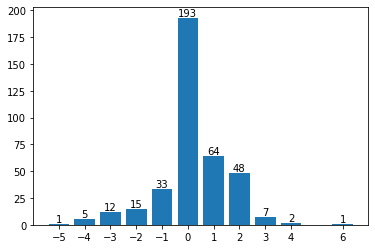

In [11]:
import matplotlib.pyplot as plt

labels, counts = np.unique(hasil, return_counts=True)

plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)

for i in range(len(labels)):
    plt.text(labels[i], counts[i], str(counts[i]),ha='center', va='bottom')
    
plt.show()

In [12]:
sentiments = ['positif' if sentimen > 0 else 'negatif' if sentimen < 0 else 'netral' for sentimen in hasil]
df['sentiment'] = sentiments
df

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,clean_tweet,sentiment
0,Wed Jun 28 05:19:38 +0000 2023,1673924092129574914,"Mulai 1 Juli 2023, Aplikasi Welma resmi pindah...",0,0,0,4,in,351429302,1673924092129574914,XpresiBCA,https://twitter.com/XpresiBCA/status/167392409...,juli aplikasi welma resmi pindah rumah mybca c...,positif
1,Thu Jun 22 11:09:01 +0000 2023,1671837690634076160,"@Rudigesper Selamat malam, @Rudigesper. Apabil...",0,0,0,0,in,567255514,1666775816431349766,BankBCA,https://twitter.com/BankBCA/status/16718376906...,rudigesper selamat malam rudigesper berminat s...,positif
2,Thu Jun 22 06:12:04 +0000 2023,1671762962238025728,"Mulai 1 Juli 2023, aplikasi Welma tidak dapat ...",0,2,0,1,in,567255514,1671762956886085637,BankBCA,https://twitter.com/BankBCA/status/16717629622...,juli aplikasi welma diakses akses fitur welma ...,negatif
3,Sun Jun 18 02:18:53 +0000 2023,1670254726045401088,Pengumuman! BCA Setop Operasi Aplikasi Welma M...,0,0,0,0,in,1668449204744900608,1670254726045401088,MinakMinmo7825,https://twitter.com/MinakMinmo7825/status/1670...,pengumuman bca setop operasi aplikasi welma ju...,netral
4,Sun Jun 18 02:18:47 +0000 2023,1670254700774690816,Pengumuman! BCA Setop Operasi Aplikasi Welma M...,0,0,0,0,in,1668449204744900608,1670254700774690816,MinakMinmo7825,https://twitter.com/MinakMinmo7825/status/1670...,pengumuman bca setop operasi aplikasi welma ju...,netral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,Sat Oct 17 04:14:00 +0000 2020,1317317915318734848,"Bingung sekarang lagi ramai bahas ORI, SR, SBR...",0,0,0,1,in,31614598,1317317915318734848,LokadataInfo,https://twitter.com/LokadataInfo/status/131731...,bingung ramai bahas ori sr sbr reksa dana peng...,negatif
377,Fri Oct 16 04:30:00 +0000 2020,1316959555050373120,"Bingung sekarang lagi ramai bahas ORI, SR, SBR...",0,0,1,0,in,31614598,1316959555050373120,LokadataInfo,https://twitter.com/LokadataInfo/status/131695...,bingung ramai bahas ori sr sbr reksa dana peng...,negatif
378,Thu Oct 15 06:46:57 +0000 2020,1316631631197732865,"Bingung orang2 skr lagi ramai bahas ORI, SR, S...",0,1,3,0,in,2837798976,1316631631197732865,smartmoney_co,https://twitter.com/smartmoney_co/status/13166...,bingung orang skr ramai bahas ori sr sbr reksa...,negatif
379,Thu Oct 08 08:15:29 +0000 2020,1314117197174722565,@gabrielleegaby Kami infokan apabila aplikasi ...,0,1,0,0,in,620977821,1314112123564294144,HaloBCA,https://twitter.com/HaloBCA/status/13141171971...,gabrielleegaby infokan aplikasi welma terbloki...,negatif


# modelling

In [13]:
mapping = {'positif': 1, 'netral': 0, 'negatif': -1}

df['sentiment'] = df['sentiment'].map(mapping)

df

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,clean_tweet,sentiment
0,Wed Jun 28 05:19:38 +0000 2023,1673924092129574914,"Mulai 1 Juli 2023, Aplikasi Welma resmi pindah...",0,0,0,4,in,351429302,1673924092129574914,XpresiBCA,https://twitter.com/XpresiBCA/status/167392409...,juli aplikasi welma resmi pindah rumah mybca c...,1
1,Thu Jun 22 11:09:01 +0000 2023,1671837690634076160,"@Rudigesper Selamat malam, @Rudigesper. Apabil...",0,0,0,0,in,567255514,1666775816431349766,BankBCA,https://twitter.com/BankBCA/status/16718376906...,rudigesper selamat malam rudigesper berminat s...,1
2,Thu Jun 22 06:12:04 +0000 2023,1671762962238025728,"Mulai 1 Juli 2023, aplikasi Welma tidak dapat ...",0,2,0,1,in,567255514,1671762956886085637,BankBCA,https://twitter.com/BankBCA/status/16717629622...,juli aplikasi welma diakses akses fitur welma ...,-1
3,Sun Jun 18 02:18:53 +0000 2023,1670254726045401088,Pengumuman! BCA Setop Operasi Aplikasi Welma M...,0,0,0,0,in,1668449204744900608,1670254726045401088,MinakMinmo7825,https://twitter.com/MinakMinmo7825/status/1670...,pengumuman bca setop operasi aplikasi welma ju...,0
4,Sun Jun 18 02:18:47 +0000 2023,1670254700774690816,Pengumuman! BCA Setop Operasi Aplikasi Welma M...,0,0,0,0,in,1668449204744900608,1670254700774690816,MinakMinmo7825,https://twitter.com/MinakMinmo7825/status/1670...,pengumuman bca setop operasi aplikasi welma ju...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,Sat Oct 17 04:14:00 +0000 2020,1317317915318734848,"Bingung sekarang lagi ramai bahas ORI, SR, SBR...",0,0,0,1,in,31614598,1317317915318734848,LokadataInfo,https://twitter.com/LokadataInfo/status/131731...,bingung ramai bahas ori sr sbr reksa dana peng...,-1
377,Fri Oct 16 04:30:00 +0000 2020,1316959555050373120,"Bingung sekarang lagi ramai bahas ORI, SR, SBR...",0,0,1,0,in,31614598,1316959555050373120,LokadataInfo,https://twitter.com/LokadataInfo/status/131695...,bingung ramai bahas ori sr sbr reksa dana peng...,-1
378,Thu Oct 15 06:46:57 +0000 2020,1316631631197732865,"Bingung orang2 skr lagi ramai bahas ORI, SR, S...",0,1,3,0,in,2837798976,1316631631197732865,smartmoney_co,https://twitter.com/smartmoney_co/status/13166...,bingung orang skr ramai bahas ori sr sbr reksa...,-1
379,Thu Oct 08 08:15:29 +0000 2020,1314117197174722565,@gabrielleegaby Kami infokan apabila aplikasi ...,0,1,0,0,in,620977821,1314112123564294144,HaloBCA,https://twitter.com/HaloBCA/status/13141171971...,gabrielleegaby infokan aplikasi welma terbloki...,-1


In [14]:
def count_sentiment():
    count_positif = df[df['sentiment']==1]['sentiment'].count()
    count_negatif = df[df['sentiment']==-1]['sentiment'].count()
    count_netral = df[df['sentiment']==0]['sentiment'].count()
    
    print('Jumlah tweet positif: ', count_positif)
    print('Jumlah tweet negatif: ', count_negatif)
    print('Jumlah tweet netral: ', count_netral)
    
count_sentiment()

Jumlah tweet positif:  122
Jumlah tweet negatif:  66
Jumlah tweet netral:  193


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [16]:
vectorizer = TfidfVectorizer(max_features=2500)

model_g = GaussianNB()


In [17]:
v_data = vectorizer.fit_transform(df['clean_tweet']).toarray()

vectorizer.fit_transform(df['clean_tweet'])

<381x1626 sparse matrix of type '<class 'numpy.float64'>'
	with 6018 stored elements in Compressed Sparse Row format>

In [18]:
X_train, X_test, y_train, y_test = train_test_split(v_data, df['sentiment'], test_size=0.2, random_state=50)
model_g.fit(X_train, y_train)

GaussianNB()

In [19]:
y_pred = model_g.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Nilai akurasinya adalah', accuracy_score(y_test, y_pred))

[[ 5  3  3]
 [ 8 22  9]
 [ 3  9 15]]
              precision    recall  f1-score   support

          -1       0.31      0.45      0.37        11
           0       0.65      0.56      0.60        39
           1       0.56      0.56      0.56        27

    accuracy                           0.55        77
   macro avg       0.51      0.52      0.51        77
weighted avg       0.57      0.55      0.55        77

Nilai akurasinya adalah 0.5454545454545454


In [20]:
v_data = vectorizer.transform(df['clean_tweet']).toarray()
y_classification = model_g.predict(v_data)

df['sentiment'] = list(y_classification)

df

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,clean_tweet,sentiment
0,Wed Jun 28 05:19:38 +0000 2023,1673924092129574914,"Mulai 1 Juli 2023, Aplikasi Welma resmi pindah...",0,0,0,4,in,351429302,1673924092129574914,XpresiBCA,https://twitter.com/XpresiBCA/status/167392409...,juli aplikasi welma resmi pindah rumah mybca c...,1
1,Thu Jun 22 11:09:01 +0000 2023,1671837690634076160,"@Rudigesper Selamat malam, @Rudigesper. Apabil...",0,0,0,0,in,567255514,1666775816431349766,BankBCA,https://twitter.com/BankBCA/status/16718376906...,rudigesper selamat malam rudigesper berminat s...,1
2,Thu Jun 22 06:12:04 +0000 2023,1671762962238025728,"Mulai 1 Juli 2023, aplikasi Welma tidak dapat ...",0,2,0,1,in,567255514,1671762956886085637,BankBCA,https://twitter.com/BankBCA/status/16717629622...,juli aplikasi welma diakses akses fitur welma ...,-1
3,Sun Jun 18 02:18:53 +0000 2023,1670254726045401088,Pengumuman! BCA Setop Operasi Aplikasi Welma M...,0,0,0,0,in,1668449204744900608,1670254726045401088,MinakMinmo7825,https://twitter.com/MinakMinmo7825/status/1670...,pengumuman bca setop operasi aplikasi welma ju...,0
4,Sun Jun 18 02:18:47 +0000 2023,1670254700774690816,Pengumuman! BCA Setop Operasi Aplikasi Welma M...,0,0,0,0,in,1668449204744900608,1670254700774690816,MinakMinmo7825,https://twitter.com/MinakMinmo7825/status/1670...,pengumuman bca setop operasi aplikasi welma ju...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,Sat Oct 17 04:14:00 +0000 2020,1317317915318734848,"Bingung sekarang lagi ramai bahas ORI, SR, SBR...",0,0,0,1,in,31614598,1317317915318734848,LokadataInfo,https://twitter.com/LokadataInfo/status/131731...,bingung ramai bahas ori sr sbr reksa dana peng...,-1
377,Fri Oct 16 04:30:00 +0000 2020,1316959555050373120,"Bingung sekarang lagi ramai bahas ORI, SR, SBR...",0,0,1,0,in,31614598,1316959555050373120,LokadataInfo,https://twitter.com/LokadataInfo/status/131695...,bingung ramai bahas ori sr sbr reksa dana peng...,-1
378,Thu Oct 15 06:46:57 +0000 2020,1316631631197732865,"Bingung orang2 skr lagi ramai bahas ORI, SR, S...",0,1,3,0,in,2837798976,1316631631197732865,smartmoney_co,https://twitter.com/smartmoney_co/status/13166...,bingung orang skr ramai bahas ori sr sbr reksa...,-1
379,Thu Oct 08 08:15:29 +0000 2020,1314117197174722565,@gabrielleegaby Kami infokan apabila aplikasi ...,0,1,0,0,in,620977821,1314112123564294144,HaloBCA,https://twitter.com/HaloBCA/status/13141171971...,gabrielleegaby infokan aplikasi welma terbloki...,-1


In [21]:
count_sentiment()

Jumlah tweet positif:  128
Jumlah tweet negatif:  71
Jumlah tweet netral:  182


## insight

In [22]:
from nltk.probability import FreqDist
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: word_tokenize(str(x)))
tweets = [word for tweet in df['clean_tweet'] for word in tweet]
fqdist = FreqDist(tweets)

most_commond_word = fqdist.most_common(20)

print(most_commond_word)

[('bca', 533), ('welma', 455), ('id', 201), ('aplikasi', 180), ('investasi', 105), ('mybca', 97), ('tks', 68), ('rekening', 65), ('ya', 61), ('halobca', 57), ('transaksi', 51), ('dana', 47), ('nasabah', 44), ('memiliki', 44), ('mengakses', 37), ('obligasi', 37), ('reksa', 37), ('mobile', 36), ('informasikan', 34), ('mohon', 33)]


In [23]:
#diagram analysis yaitu 2 kata yang sangat menempel
result = pd.Series(nltk.ngrams(tweets, 2)).value_counts()[:20]
print(result)

(bca, id)               175
(aplikasi, welma)       125
(welma, bca)             84
(reksa, dana)            36
(senang, hati)           28
(user, id)               25
(id, mengakses)          24
(id, welma)              24
(rekening, bca)          24
(bca, welma)             23
(mybca, welma)           22
(halo, bca)              21
(hati, informasikan)     20
(aplikasi, mybca)        19
(klikbca, individu)      17
(registrasi, bca)        17
(id, aplikasi)           17
(cabang, bca)            16
(welma, langkahawal)     16
(login, welma)           15
dtype: int64


In [24]:
df['clean_tweet'] = df['clean_tweet'].str.join(' ')


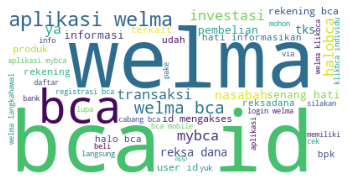

In [27]:
from wordcloud import WordCloud

combining_text  = " ".join([review for review in df['clean_tweet']])

wc = WordCloud(background_color='white', max_words=50)

plt.imshow(wc.generate(combining_text))
plt.axis('off')
plt.show()

In [28]:
combining_text

'juli aplikasi welma resmi pindah rumah mybca cek investasi praktis portofolio investasi diakses fitur welma mybca yuk verifikasi bca id amp lanjutkan investasi fitur welma mybca aplikasi welma httpstcoupudekmj rudigesper selamat malam rudigesper berminat silakan ajukan aplikasi welma website bca info detail silakan cek link httpstcoeckejayo juli aplikasi welma diakses akses fitur welma mybca lupa aktifkan bca id mengakses fitur welma mybca info baca artikel httpstcoapdqjywwx pengumuman bca setop operasi aplikasi welma juli httpstcoddmgvdjzof pengumuman bca setop operasi aplikasi welma juli httpstcoddmgvdjzof terpopuler juli aplikasi welma milik pt bank central asia tbk bca diakses simak penjelasannya httpstcojbeziuywk terpopuler juli aplikasi welma milik pt bank central asia tbk bca diakses simak penjelasannya httpstcomfbqwmdo silakan download aplikasi mybca lupa aktivasi bca id pastikan bca id terdaftar aplikasi welma bca id aplikasi mybca welma tutup panik pindah mybca aktivasi bca 

In [ ]:
pip install wordcloud


In [ ]:
!pip install --upgrade Pillow --user

In [ ]:
from wordcloud import WordCloud

combining_text  = "".join([review for review in df['clean_tweet']])

font_path = 'C:/Users/LENOVO/ARIAL.TTF'

wordcloud = WordCloud(font_path='arial', background_color="white", max_font_size=50, max_words=100)
wordcloud = wordcloud.generate_from_text(combining_text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# wc = WordCloud(background_color='white', max_words=20, font_path='ARIAL.TTF')

# plt.imshow(wc.generate(combining_text))
# plt.axis('off')
# plt.show()


In [ ]:
print(combining_text)